## DIY Project  for Data Mining and Analytics- DIY 1

# ------------------------------------------------------------


### Vivek Kumar Shriwas
### SY BSC COMPUTER SCEINCE 
### SRN NO. 202100756
### SEMESTER III



# -------------------------------------------------------------

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Q1) Clean, filter and Load data

## Importing the Data     
>MOVIES CSV

In [2]:
df = pd.read_csv('Movies.csv',encoding_errors='ignore')

In [3]:
df

,MovieID,Title,Category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
2944,3948,Meet the Parents (2000),Comedy
2945,3949,Requiem for a Dream (2000),Drama
2946,3950,Tigerland (2000),Drama
2947,3951,Two Family House (2000),Drama


## Data Frame

In [4]:
df = pd.read_csv('Movies.csv',encoding_errors='ignore')

In [5]:
df

,MovieID,Title,Category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
2944,3948,Meet the Parents (2000),Comedy
2945,3949,Requiem for a Dream (2000),Drama
2946,3950,Tigerland (2000),Drama
2947,3951,Two Family House (2000),Drama


## Exploding Data set

> The Category Column of the Movies.csv dataset having values in Pipe seperated ('|') values in series.we need to first remove this pipe seperation and align them in proper list order.

In [6]:
df['Category']=df['Category'].apply(lambda x: str(x.replace('|', ',')))
df

,MovieID,Title,Category
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji (1995),"Adventure,Children,Fantasy"
2,3,Grumpier Old Men (1995),"Comedy,Romance"
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance"
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
2944,3948,Meet the Parents (2000),Comedy
2945,3949,Requiem for a Dream (2000),Drama
2946,3950,Tigerland (2000),Drama
2947,3951,Two Family House (2000),Drama


In [7]:
df['Category']=df.Category.str.split(',')
df

,MovieID,Title,Category
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
2944,3948,Meet the Parents (2000),[Comedy]
2945,3949,Requiem for a Dream (2000),[Drama]
2946,3950,Tigerland (2000),[Drama]
2947,3951,Two Family House (2000),[Drama]


In [8]:
df=df.explode('Category')
df

,MovieID,Title,Category
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
2945,3949,Requiem for a Dream (2000),Drama
2946,3950,Tigerland (2000),Drama
2947,3951,Two Family House (2000),Drama
2948,3952,"Contender, The (2000)",Drama


## Describing DataFrame

In [9]:
df.describe()

,MovieID
count,6385.000000
mean,1923.312451
std,1138.398938
min,1.000000
25%,947.000000
50%,1968.000000
75%,2885.000000
max,3952.000000


## Shape of the Dataset

In [10]:
df.shape

(6385, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6385 entries, 0 to 2948
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MovieID   6385 non-null   int64 
 1   Title     6385 non-null   object
 2   Category  6385 non-null   object
dtypes: int64(1), object(2)
memory usage: 199.5+ KB


## checking duplicate 

In [12]:
df.duplicated()

0       False
0       False
0       False
0       False
0       False
        ...  
2945    False
2946    False
2947    False
2948    False
2948    False
Length: 6385, dtype: bool

## checking Null values

In [13]:
df.isnull()

,MovieID,Title,Category
0,False,False,False
0,False,False,False
0,False,False,False
0,False,False,False
0,False,False,False
...,...,...,...
2945,False,False,False
2946,False,False,False
2947,False,False,False
2948,False,False,False


In [14]:
df.isnull().sum()

MovieID     0
Title       0
Category    0
dtype: int64

<AxesSubplot:>

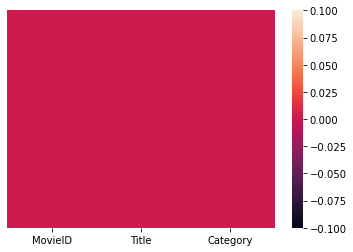

In [15]:
sns.heatmap(df.isnull(), yticklabels=False)

> Gives a bar chart of the missing values

<AxesSubplot:>

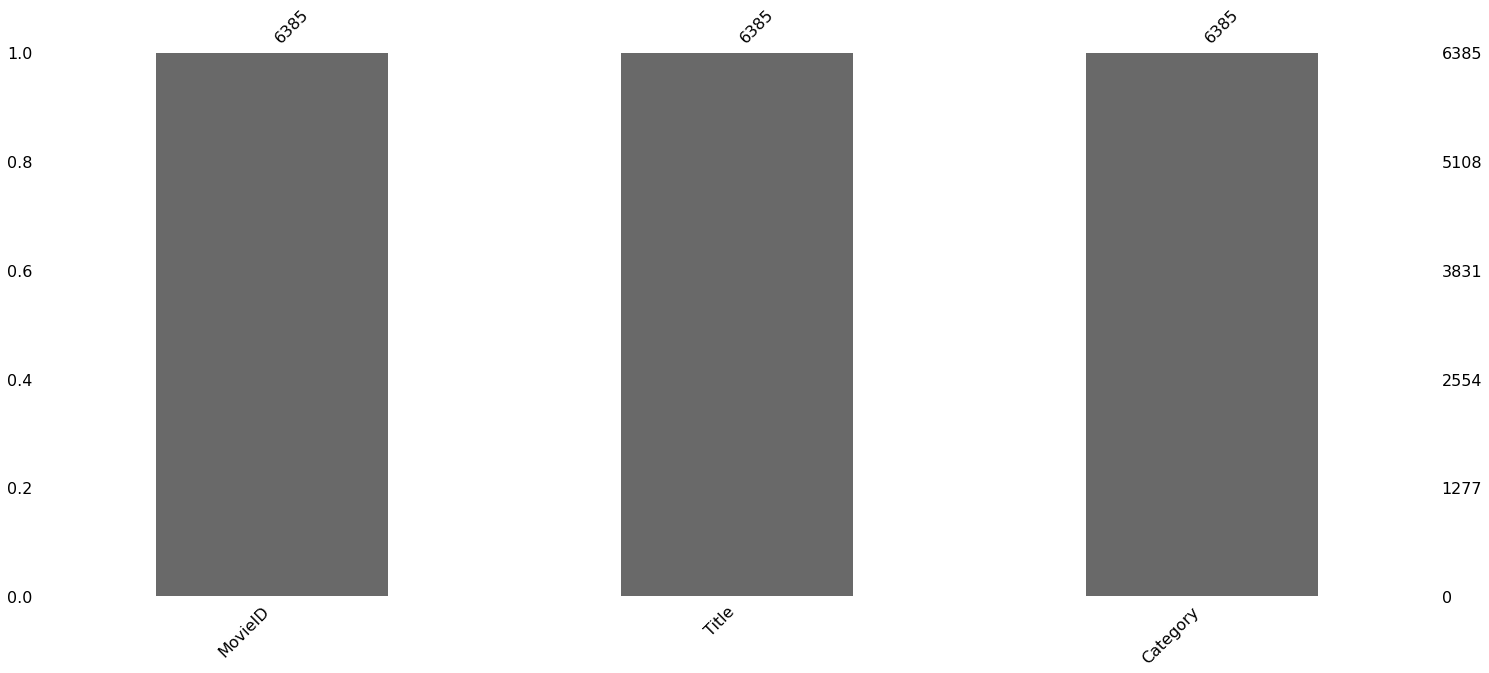

In [16]:

msno.bar(df)

## Filtering Data

In [17]:
bool_series1 = pd.isnull(df["MovieID"])
df[bool_series1]

,MovieID,Title,Category


In [18]:
bool_series1 = pd.isnull(df["Title"])
df[bool_series1]

,MovieID,Title,Category


In [19]:
bool_series1 = pd.isnull(df["Category"])
df[bool_series1]

,MovieID,Title,Category


> USER CSV

## Dataframe

df1 = pd.read_csv("Users.csv")

In [20]:
df1

NameError: name 'df1' is not defined

## Describing DataFrame

In [ ]:
df1.describe()

## Shape of the Dataset

In [ ]:
df1.shape

In [ ]:
df1.info()

## checking duplicate 

In [ ]:
df1.duplicated()

## checking Null values

In [ ]:
df1.isnull()

In [ ]:
df1.isnull().sum()

In [ ]:
sns.heatmap(df1.isnull(), yticklabels=False)

> Gives a bar chart of the missing values

In [ ]:
msno.bar(df1)

In [ ]:
bool_series1 = pd.isnull(df1["UserID"])
df1[bool_series1]

In [ ]:
bool_series1 = pd.isnull(df1["Gender"])
df1[bool_series1]

In [ ]:
bool_series1 = pd.isnull(df1["Age"])
df1[bool_series1]

In [ ]:
bool_series1 = pd.isnull(df1["Occupation"])
df1[bool_series1]

>>Putting up in 'user file' age according to numbers in project file like (1-> Under 18) ,(18-> 18-24) ,(25-> 25-34) ....


In [ ]:

Age_conditions = [
    (df1['Age'] == 1),
    (df1['Age'] == 18),
    (df1['Age'] == 25),
    (df1['Age'] == 35),
    (df1['Age'] == 45),
    (df1['Age'] == 50),
    (df1['Age'] == 56),
]

Age_values = ['Under 18','18-24','25-34','35-44','45-49','50 - 55','Above 56']

df1['Age'] = np.select(Age_conditions,Age_values)

print(df1)


> Putting up in 'user file' ococcupation according to numbers in project file like 0->Not specified or other ,1->Academician ,2-> Artist ....


In [ ]:

conditions = [
    (df1['Occupation'] == 0),
    (df1['Occupation'] == 1),
    (df1['Occupation'] == 2),
    (df1['Occupation'] == 3),
    (df1['Occupation'] == 4),
    (df1['Occupation'] == 5),
    (df1['Occupation'] == 6),
    (df1['Occupation'] == 7),
    (df1['Occupation'] == 8),
    (df1['Occupation'] == 9),
    (df1['Occupation'] == 10),
    (df1['Occupation'] == 11),
    (df1['Occupation'] == 12),
    (df1['Occupation'] == 13),
    (df1['Occupation'] == 14),
    (df1['Occupation'] == 15),
    (df1['Occupation'] == 16),
    (df1['Occupation'] == 17),
    (df1['Occupation'] == 18),
    (df1['Occupation'] == 19),
    (df1['Occupation'] == 20),
]

values = ['Not specified or other','Academician','Artist','Admin/Office  work',
         'Grad/Higher Ed student','Customer Service/Consultant','Doctor and Medical services',
          'Executive and Managerial','Farmer and Agriculture','Homemaker','K-12 Student',
          'Lawyer','Programmer','Retired','Sales and Marketing','Scientist','Self-Employed',
          'Engineer and Technician','Tradesman/Craftsman','Unemployed','Writer']

df1['Occupation'] = np.select(conditions,values)

print(df1)

> RATINGS CSV

## Data Frame

In [ ]:
df2 = pd.read_csv("Ratings.csv")

In [ ]:
df2

In [ ]:
df2.describe()

## Shape of the Dataset

In [ ]:
df2.shape

In [ ]:
df2.info()

## checking duplicate 

In [ ]:
df2.duplicated()

## checking Null values

In [ ]:
df2.isnull()

In [ ]:
df2.isnull().sum()

In [ ]:
sns.heatmap(df2.isnull(), yticklabels=False)

>  Gives a bar chart of the missing values

In [ ]:

msno.bar(df2)

## Filter Data

In [ ]:
bool_series1 = pd.isnull(df2["UserID"])
df2[bool_series1]

In [ ]:
bool_series2 = pd.isnull(df2["MovieID"])
df2[bool_series2]

In [ ]:
bool_series3 = pd.isnull(df2["Rating"])
df2[bool_series3]

# ------------------------------------------- Q2 )-------------------------------------

> i) Total number of movies released in each year. Display year and the count.

> Creating a new column name Year and putting up the year's of movive released 

In [ ]:

df['Year']=df["Title"].str[-5:-1]
df


In [ ]:

data=df.groupby("Year").count()["MovieID"]
print(data.tail())

df.groupby("Year").count()["MovieID"].plot()

# sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year and Number Of Movies")
plt.xlabel('Release year')
plt.ylabel('Number Of Movies')
sns.set_style("whitegrid")

In [ ]:
df['Year'].dtypes

In [ ]:
df = df.astype({'Year':'int'})

In [ ]:
df['Year'].dtypes

> ii) Find the movie category having highest ratings in each year. The output should comprise of


> YearofRelease, Category, CountOfMovies having highest rating.

> iii) Find and display movie category and age group 
 wise likings. 
 
 This may be based on the highest number of users from each age group rated for that movie category.

In [ ]:
All_merged_df = pd.merge(df, df2, on='MovieID')
All_merged_df = pd.merge(All_merged_df, df1, on='UserID')
All_merged_df

In [ ]:

def find_minmax(x):
    min_index = All_merged_df[x].idxmin()
    high_index = All_merged_df[x].idxmax()
    high = pd.DataFrame(All_merged_df.loc[high_index,:])
    low = pd.DataFrame(All_merged_df.loc[min_index,:])

    print("Movie Which Has Highest "+ x + " : ",All_merged_df['Category'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",All_merged_df['Category'][min_index])


In [ ]:
find_minmax('Rating')

In [ ]:
def find_minmax(x):
    min_index = All_merged_df[x].idxmin()
    high_index = All_merged_df[x].idxmax()
    high = pd.DataFrame(All_merged_df.loc[high_index,:])
    low = pd.DataFrame(All_merged_df.loc[min_index,:])

    print("Age group to watch Highest Movies " + ": ",All_merged_df['Age'][high_index])
    print("Age group to watch Lowest Movies  "+ ": ",All_merged_df['Age'][min_index])


In [ ]:
find_minmax('Rating')

> iv) Use Cluster models to segregate movie category and age group wise likings. 

In [ ]:
Seg_df = pd.read_csv('Movies.csv',encoding_errors='ignore')

In [ ]:
Seg_df

In [ ]:
test_ = Seg_df["Category"].str.split('|',n=4,expand=True)

In [ ]:
test_

In [ ]:
test_.rename(columns = {0:'Category1',1:'Category2',2:'Category3',3:'Category4',4:'Category5'})

In [ ]:
Seg_df[['Category1','Category2','Category3','Category4','Category5']] = Seg_df["Category"].str.split('|',n=4,expand=True)
Seg_df

In [ ]:
Seg_df.drop('Category', axis = 1)

> age group wise likings

> All_merged_df.plot.scatter(x = 'Category', y = 'Occupation', s = 100);

In [ ]:

ax2 = All_merged_df.plot.scatter(title="Category V/S Age",x='Category',y='Age',c='Green')
plt.xticks(rotation = 90)

>  v) Display year wise count of movies released.

In [ ]:
data=df.groupby("Year").count()["MovieID"]
print(data.head(100))


> vi) Display year wise, category wise count of movies released.

In [ ]:
data1=df.groupby("Category").count()["MovieID"]
data1.head()

In [ ]:
data2=df.groupby("Year").count()["MovieID"]
data2.head()

## Merge

In [ ]:
Q = pd.DataFrame(df, columns=['Year','Category'])

In [ ]:
Q

In [ ]:
Out=pd.merge(data2,Q, on='Year')

In [ ]:
Out

In [ ]:
Out2=pd.merge(data1,Q, on='Category')
Out2

In [ ]:
Out3=pd.merge(Out,Out2, on='Year')

In [ ]:
Out3.rename(columns = {'MovieID_x':'Movies Per Year'}, inplace = True)
Out3.rename(columns ={'MovieID_y':'Movies Per Category'}, inplace = True)
Out3.rename(columns ={'Category_x':'Category'}, inplace = True)
Out3=Out3.drop(['Category_y'], axis=1)

In [ ]:
Out3

>  vii) Use Clustering methods to segregate movie category and occupation of users. Display details. With the data, 
 train the model and predict that when an occupation is entered, the model can predict the movie likings to that
 category of occupation.

In [ ]:
All_merged_df["Category"]

In [ ]:
All_merged_df["Occupation"]

> All_merged_df.plot.scatter(x = 'Category', y = 'Occupation', s = 100);

In [ ]:

ax2 = All_merged_df.plot.scatter(title="Occupation V/S Category",x='Category',y='Occupation',c='Green')
plt.xticks(rotation = 90)

> Initialising

In [ ]:


test_df = pd.DataFrame({
    'x':All_merged_df["Category"],
    'y':All_merged_df["Occupation"]
})

np.random.seed(200)
k = 3
# centroids[i] = [x,y]
centroids = {
    i+1:[np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}

fig = plt.figure(figsize=(25,15))
plt.scatter(test_df['x'],test_df['y'], color='k')
colmap = {1:'r',2:'g',3:'b'}
for i in centroids. keys():
    plt.scatter(*centroids[i],color = colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

> viii) Now include, the age group to the above model in addition to occupation of users to refine the predictive model.

In [ ]:
md_small = All_merged_df.iloc[:, [1,3,5,6,7,8]]
md_small.head()
md_small.dtypes
md_small['Occupation'] = md_small['Occupation'].str[:5]
pd.to_numeric(md_small['Occupation'])
md_small[md_small.columns[1:]].corr()['Rating'][:]
master_features = pd.merge(md_small, one_hot_genres, left_index=True, right_index=True)
master_features.head()
X_feature = md_small.drop(['Occupation'], axis=1)
X_feature.head()
X_feature_small = X_feature[X_feature['MovieID'] < 50] 
X_feature_small_trimmed = X_feature_small.drop(['MovieID','Rating'], axis=1)
X_feature_small_trimmed.shape
X_feature_small_trimmed.head()
Y_target = master_features['Rating'][master_features['MovieID']< 50]
Y_target.shape
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_feature_small_trimmed,Y_target,random_state=1)
from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=100000)
logreg = LogisticRegression(max_iter=100000)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

# print the first 30 true and predicted responses
print ('actual:    ', y_test.values[0:30])
print ('predicted: ', y_pred[0:30])


# User Interface Q3)

>>  Develop a simple User Interface including all the queries and processes above to make it a functional system.

In [28]:
 #from pandasgui import show

In [29]:
gui = show(All_merged_df)